In [1]:
%load_ext memory_profiler

In [2]:
%%writefile memscript.py
def create_graph():
    n = 20
    from pyscal_rdf import StructureGraph
    g = StructureGraph()
    struct_Fe = g.create_structure("l12", element=['Al', 'Ni'], lattice_constant=3.57, repetitions=[n,n,n])

Overwriting memscript.py


In [3]:
from memscript import create_graph
%mprun -T mprof0 -f create_graph create_graph()

['Al', 'Ni']
*** KeyboardInterrupt exception caught in code being profiled.

*** Profile printout saved to text file mprof0. *** KeyboardInterrupt exception caught in code being profiled.


Filename: /mnt/c/Users/menon/Documents/winrepos/projects-iuc17/pyscal_rdf/notebooks/memscript.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     1     63.5 MiB     63.5 MiB           1   def create_graph():
     2     63.5 MiB      0.0 MiB           1       n = 20
     3    144.4 MiB     80.9 MiB           1       from pyscal_rdf import StructureGraph
     4    144.5 MiB      0.1 MiB           1       g = StructureGraph()
     5    501.8 MiB    357.3 MiB           1       struct_Fe = g.create_structure("l12", element=['Al', 'Ni'], lattice_constant=3.57, repetitions=[n,n,n])

In [10]:
def na(x):
    return x**3*4
na = [na(2), na(10), na(20), na(30), na(40)]
#structuregraph
s1 = [0.9, 95.3, 783.5, 2685, 6571]
#rdfgraph
s2 = [0.2, 52.9, 458, 1442.7]
#read file
s3 = [5.5, 60, 500, 1716]
#updated code
s4 = [11.5, 69.1, ]

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
s1f = np.polyfit(na, s1, 1)
s2f = np.polyfit(na[:-1], s2, 1)
s3f = np.polyfit(na[:-1], s3, 1)

In [16]:
sx = np.linspace(0, 250000, 100)

In [34]:
np.polyval(s1f, 1000000)

25640.171489323624

In [35]:
np.polyval(s2f, 1000000)

13353.322371743954

In [36]:
np.polyval(s3f, 1000000)

15883.043089861434

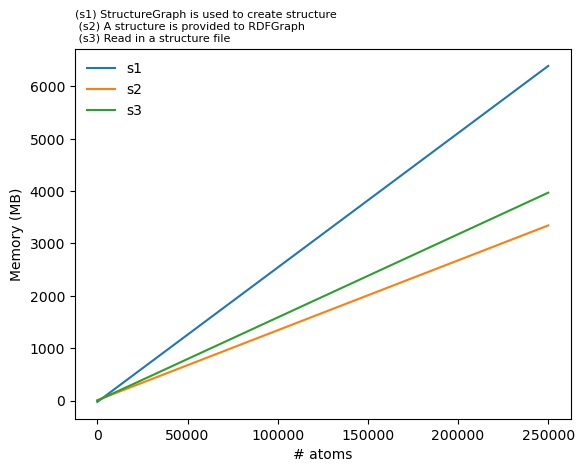

In [33]:
plt.plot(sx, np.polyval(s1f, sx), label="s1")
plt.plot(sx, np.polyval(s2f, sx), label='s2')
plt.plot(sx, np.polyval(s3f, sx), label='s3')
plt.legend(frameon=False)
plt.xlabel("# atoms")
plt.ylabel("Memory (MB)")
plt.title("(s1) StructureGraph is used to create structure \n (s2) A structure is provided to RDFGraph\n (s3) Read in a structure file", loc="left", fontsize=8)
plt.savefig("mem_usage.png", dpi=300)

In [38]:
from ase.io import read

In [39]:
%%memit
read("n30.dump", format='lammps-dump-text')

peak memory: 659.62 MiB, increment: 36.79 MiB


In [40]:
from pyscal.core import System

In [41]:
%%memit
sys = System("n30.dump", format='lammps-dump')

peak memory: 641.12 MiB, increment: 1.18 MiB
